# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [124]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

import pandas as pd
signnames = pd.read_csv('signnames.csv')

In [125]:
### To start off let's do a basic data summary.
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train.shape[1]
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


Let's take a quick look at the distribution of the classes:

In [126]:
from bokeh.charts import Histogram
from bokeh.charts import defaults, vplot, hplot, show, output_notebook
defaults.plot_width = 900
defaults.plot_height = 300
output_notebook(hide_banner=True)
hist = Histogram(y_train) #, x_axis_label='Documents', y_axis_label='Sparsity')
hist.xaxis.axis_label = 'Class'
hist.yaxis.axis_label = 'Frequency'
show(hist)

Training data shape =  (39209, 32, 32, 3)
Number of channels in each image =  3


/home/mattwg/Projects/traffic-signs/helpers.py:49: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 35288
  class_indices = indices[bidx]


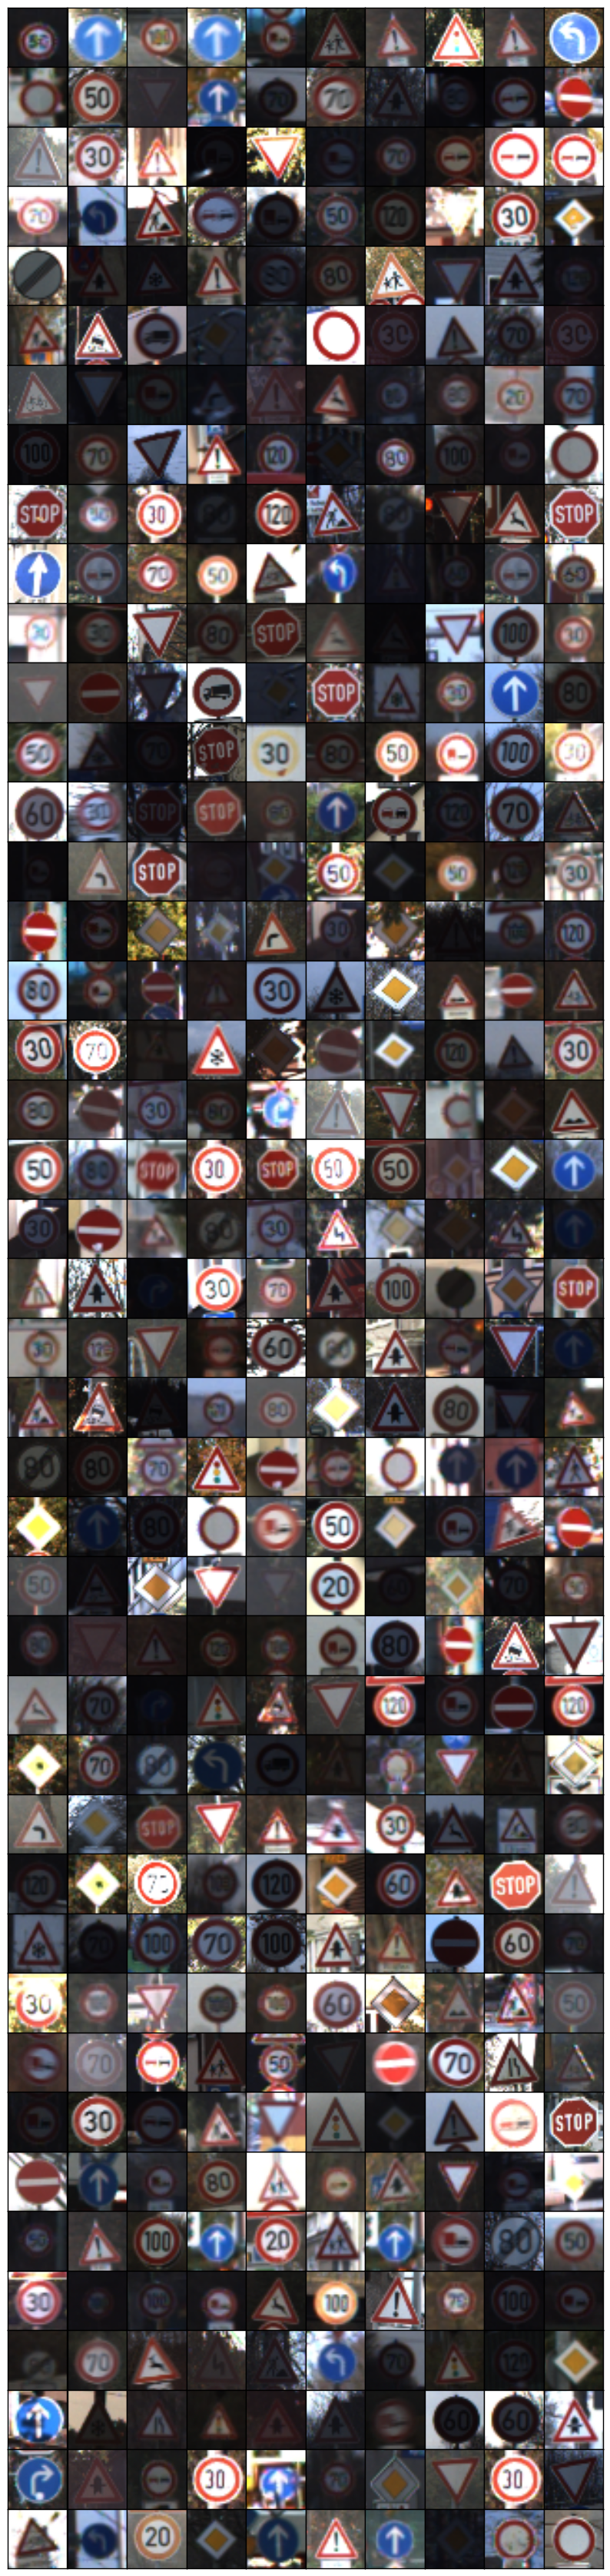

In [145]:
%run helpers.py
%matplotlib inline

print("Training data shape = ", X_train.shape)
print("Number of channels in each image = ", X_train.shape[3])

idx = sample_indices(X_train, y_train, 10)

plot_images(X_train[idx,:,:,:], 10)

Here are some challenges we can see in this data set:

* Class imbalance
* Poor quality images - due to:
    * motion blur
    * low light conditions
    * low contrast images
    * high exposure images
    * obstruction due to shadows
    * obstruction due to graffiti

Here are some observations that may inform choice of data preprocessing and machine learning approach:

* All images contain traffic signs - so we are only concerned with classification not detection
* The signs are largely centred in the image
* The data already contains transformed (jittered) versions of images which will help when training deep convolutional networks.


With more time I would like to do the following data visualizations:

* Boxplots of RGB values by class - to ensure that images of certain signs are not clustered in RGB space 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

We also need to create a validation dataset.   Here I take 10% of the test data for validation during training.  We will reserve the test data for model performance evaluation - it will play no part in the training of the models.

Note - the default conda environment did not have correct version of scikit-learn - needed `conda install scikit-learn` to fix.  Helped by this [post](https://github.com/scikit-learn/scikit-learn/issues/6161).

Before we can get going the training and test labels require one-hot encoding:

We need to flatten our input features - currently 32 x 32 to a vector of length 1024:

We need to normalise features for models into range 0.1 to 0.9

Plans for model architecture:

* Start with simple linear classifier on the data directly - like the lab - just to check tensorflow API out.
* Then make deeper traditional multi-layer neural networks
* Finally we will build a convnet - we will choose LeNet since we studied that in the lab.

We will use stochastic gradient descent (minibatch).   Output layers to all networks will apply softmax to logits to get probability distribution across the multiple classes.   We will use the cross entropy error function.  Between hidden layers we will include relus.  Weights will be initialised to small random values sampled from a truncated_normal.

Before we start I create a wrapper function to implement Early Stopping, to serialize model and performance data.  We can reuse this for different model architectures.

Here's the story:

Worked in grayscale.

Used AWS - so wrote standalone python code.  Link to programs.  

I also implemented early stopping
Trained a simple linear classifer - show train-lin.py.  Load model and show performance.
Trained a fully connected.  WOrked better
Trained a cnn - worked best

I was also interested in the effect of rebalancing the data - so I jittered the images to create a dataset that had the same number of images per class.  

Load the checkpoints and score the validation data - visualise some of the prediction errors and contingency matrices.

Evaulate the best model on the test data

Next steps:
Color images?
Explore why resampling not helping?  Maybe too crude - and introducing dark patches that may be being picked up by the classifier.





### Linear Classifier

Lets start with linear classifier - single layer implementing a simple Linear Function WX + b:

In [87]:
import tensorflow as tf
from tensorflow.python.ops.variables import Variable

features_count = 32 * 32

features = tf.placeholder(tf.float32, [None, features_count])
labels = tf.placeholder(tf.float32, [None, n_classes]) 

weights = tf.Variable(tf.truncated_normal(stddev=0.1, dtype=tf.float32, shape=[features_count, n_classes]))
biases = tf.Variable(tf.zeros([n_classes]))

train_feed_dict = {features: X_train_gray_flat, labels: train_labels}
valid_feed_dict = {features: X_valid_gray_flat, labels: valid_labels}
test_feed_dict = {features: X_test_gray_flat, labels: test_labels}

logits = tf.matmul(features, weights) + biases

prediction = tf.nn.softmax(logits)
predicted_class = tf.argmax(prediction, dimension=1)

cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)

init = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)
    
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

In [88]:
train_linear = False
if train_linear:
    result = train_model(model_name='linear',
                            init=init,
                            loss=loss,
                            features=features,
                            labels=labels,
                            X_train= X_train_gray_flat,
                            y_train=train_labels,
                            train_feed_dict=train_feed_dict,
                            valid_feed_dict=valid_feed_dict,
                            accuracy=accuracy,
                            predicted_class=predicted_class,
                            batch_size=100, 
                            epochs=2000,
                            learning_rate=0.2,
                            early_stopping_rounds = 10)
    serialize_training_data('models/linear-train', result)
    train_linear = False
else:
    result = deserialize_training_data('models/linear-train')

training_plots(result)
print('Validation accuracy at {}'.format(result['validation_accuracy']))
cm = confusion_matrix(y_true=y_valid,
                          y_pred=result['y_pred'])
output_notebook(hide_banner=True)
show(plot_contingency_matrix(cm, n_classes, list(signnames['SignName'])))

Validation accuracy at 0.9191532731056213


Surprisingly good accuracy for such a simple network.  Let's add a hidden layer.

### Single Hidden Layer

Here we implement a single hidden layer of width 200.  Also I updated the code to include **early stopping**.  Easier to let the network train for many iterations - stopping if no improvement after a specified number of iterations.

In [89]:
import tensorflow as tf
from tensorflow.python.ops.variables import Variable

features_count = 32 * 32
n_hidden_layer = 200

features = tf.placeholder(tf.float32, [None, features_count])
labels = tf.placeholder(tf.float32, [None, n_classes]) 

weights = {
    'hidden_layer': tf.Variable(tf.random_normal(shape=[features_count, n_hidden_layer], stddev=0.05, dtype=tf.float32)),
    'output_layer': tf.Variable(tf.random_normal(shape=[n_hidden_layer, n_classes], stddev=0.05, dtype=tf.float32))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal(shape=[n_hidden_layer], stddev=0.05, dtype=tf.float32)),
    'output_layer': tf.Variable(tf.random_normal(shape=[n_classes], stddev=0.05, dtype=tf.float32))
}

out = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
out = tf.nn.relu(out)
logits = tf.matmul(out, weights['output_layer']) + biases['output_layer']
prediction = tf.nn.softmax(logits)
predicted_class = tf.argmax(prediction, dimension=1)

train_feed_dict = {features: X_train_gray_flat, labels: train_labels}
valid_feed_dict = {features: X_valid_gray_flat, labels: valid_labels}
test_feed_dict = {features: X_test_gray_flat, labels: test_labels}

cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)

init = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)
    
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

In [90]:
train_fully_connected=False
if train_fully_connected:
    result = train_model(model_name='fully_connected',
                            init=init,
                            loss=loss,
                            features=features,
                            labels=labels,
                            X_train= X_train_gray_flat,
                            y_train=train_labels,
                            train_feed_dict=train_feed_dict,
                            valid_feed_dict=valid_feed_dict,
                            accuracy=accuracy,
                            predicted_class=predicted_class,batch_size=100, 
                            epochs=2000,
                            learning_rate=0.05,
                            early_stopping_rounds = 10)
    serialize_training_data('models/fully_connected', result)
    train_linear = False
else:
    result = deserialize_training_data('models/fully_connected')

training_plots(result)
print('Validation accuracy at {}'.format(result['validation_accuracy']))
cm = confusion_matrix(y_true=y_valid,
                          y_pred=result['y_pred'])
output_notebook(hide_banner=True)
show(plot_contingency_matrix(cm, n_classes, list(signnames['SignName'])))

Validation accuracy at 0.9492476582527161


Which images are not being classified correctly?  Here we display images that are misclassified into a class - the first two images represent correct classifications, followed by 8 images that we incorrectly classified as the same:

In [ ]:
idx = sample_misclassified(result['y_pred'], y_valid)
plot_image_grid(X_valid_gray, idx, grayscale = True)

We could train a deeper network - but I think it may be better to build a convolutional neural network.  I think we might get similar performance but quicker.

### Convnet

I am going to start with LeNet from the lecture.

First let's pull in helper functions to quickly define layers:

In [136]:
def LeNet(x):
    x = tf.reshape(x, (-1, 32, 32, 1))
    # Convolution layer 1. The output shape should be 28x28x6.
    x=conv_layer(input=x, num_input_channels=1, filter_size=5, num_filters=6, stride=1, padding='VALID')
    # Activation 1. Your choice of activation function.
    x=tf.nn.relu(x)
    # Pooling layer 1. The output shape should be 14x14x6.
    x=tf.nn.max_pool(value=x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # Convolution layer 2. The output shape should be 10x10x16.
    x=conv_layer(input=x, num_input_channels=6, filter_size=5, num_filters=16, stride=1, padding='VALID')
    # Activation 2. Your choice of activation function.
    x=tf.nn.relu(x)
    # Pooling layer 2. The output shape should be 5x5x16.
    x=tf.nn.max_pool(value=x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # Flatten layer. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
    x=tf.contrib.layers.flatten(x)
    # Fully connected layer 1. This should have 120 outputs.
    x=fully_connected_layer(x, 400, 120)
    # Activation 3. Your choice of activation function.
    x=tf.nn.relu(x)
    # Fully connected layer 2. This should have 10 outputs.
    x=fully_connected_layer(x, 120, 43)
    # Return the result of the last fully connected layer.
    return x

In [140]:
import tensorflow as tf
from tensorflow.python.ops.variables import Variable

features_count = 32 * 32

features = tf.placeholder(tf.float32, [None, features_count])
labels = tf.placeholder(tf.float32, [None, n_classes]) 

# Note we reshape flattened feature back to 32x32 in LeNet:
leNet = LeNet(features)

prediction = tf.nn.softmax(leNet)
predicted_class = tf.argmax(prediction, dimension=1)

train_feed_dict = {features: X_train_gray_flat, labels: train_labels}
valid_feed_dict = {features: X_valid_gray_flat, labels: valid_labels}
test_feed_dict = {features: X_test_gray_flat, labels: test_labels}

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(leNet, labels))

init = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)
    
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

In [144]:
%run helpers.py

train_lenet=True
if train_lenet:
    result = train_model(model_name='lenet',
                            init=init,
                            loss=loss,
                            features=features,
                            labels=labels,
                            X_train= X_train_gray_flat,
                            y_train=train_labels,
                            train_feed_dict=train_feed_dict,
                            valid_feed_dict=valid_feed_dict,
                            accuracy=accuracy,
                            predicted_class=predicted_class,
                            batch_size=100, 
                            epochs=2,
                            learning_rate=0.001,
                            early_stopping_rounds = 10,
                            opt="GD")
    serialize_training_data('models/lenet', result)
    train_linear = False
else:
    result = deserialize_training_data('models/lenet')

training_plots(result)
print('Validation accuracy at {}'.format(result['validation_accuracy']))
cm = confusion_matrix(y_true=y_valid,
                          y_pred=result['y_pred'])
output_notebook(hide_banner=True)
show(plot_contingency_matrix(cm, n_classes, list(signnames['SignName'])))

  0%|          | 0/2 [00:00<?, ?epochs/s]


FailedPreconditionError: Attempting to use uninitialized value Variable_82/Adam
	 [[Node: save_6/save = SaveSlices[T=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_6/Const_0, save_6/save/tensor_names, save_6/save/shapes_and_slices, Variable, Variable_1, Variable_10, Variable_11, Variable_12, Variable_13, Variable_14, Variable_15, Variable_16, Variable_17, Variable_18, Variable_19, Variable_2, Variable_20, Variable_21, Variable_22, Variable_23, Variable_24, Variable_25, Variable_26, Variable_27, Variable_28, Variable_29, Variable_3, Variable_30, Variable_31, Variable_32, Variable_33, Variable_34, Variable_35, Variable_36, Variable_37, Variable_38, Variable_39, Variable_4, Variable_40, Variable_41, Variable_42, Variable_43, Variable_44, Variable_45, Variable_46, Variable_47, Variable_48, Variable_49, Variable_5, Variable_50, Variable_51, Variable_52, Variable_53, Variable_54, Variable_55, Variable_56, Variable_57, Variable_58, Variable_59, Variable_6, Variable_60, Variable_61, Variable_62, Variable_63, Variable_64, Variable_65, Variable_66, Variable_66/Adam, Variable_66/Adam_1, Variable_67, Variable_67/Adam, Variable_67/Adam_1, Variable_68, Variable_68/Adam, Variable_68/Adam_1, Variable_69, Variable_69/Adam, Variable_69/Adam_1, Variable_7, Variable_70, Variable_70/Adam, Variable_70/Adam_1, Variable_71, Variable_71/Adam, Variable_71/Adam_1, Variable_72, Variable_72/Adam, Variable_72/Adam_1, Variable_73, Variable_73/Adam, Variable_73/Adam_1, Variable_74, Variable_75, Variable_76, Variable_77, Variable_78, Variable_79, Variable_8, Variable_80, Variable_81, Variable_82, Variable_82/Adam, Variable_82/Adam_1, Variable_83, Variable_83/Adam, Variable_83/Adam_1, Variable_84, Variable_84/Adam, Variable_84/Adam_1, Variable_85, Variable_85/Adam, Variable_85/Adam_1, Variable_86, Variable_86/Adam, Variable_86/Adam_1, Variable_87, Variable_87/Adam, Variable_87/Adam_1, Variable_88, Variable_88/Adam, Variable_88/Adam_1, Variable_89, Variable_89/Adam, Variable_89/Adam_1, Variable_9, beta1_power, beta1_power_1, beta2_power, beta2_power_1)]]

Caused by op 'save_6/save', defined at:
  File "/home/mattwg/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mattwg/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-144-9fd80deeb07c>", line 20, in <module>
    opt="GD")
  File "/home/mattwg/Projects/traffic-signs/helpers.py", line 123, in train_model
    saver = tf.train.Saver()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 986, in __init__
    self.build()
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1015, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 618, in build
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 298, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 244, in save_op
    tensor_slices=tensor_slices)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/io_ops.py", line 180, in _save
    tensors, name=name)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 438, in _save_slices
    data=data, name=name)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 756, in apply_op
    op_def=op_def)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/mattwg/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_82/Adam
	 [[Node: save_6/save = SaveSlices[T=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_6/Const_0, save_6/save/tensor_names, save_6/save/shapes_and_slices, Variable, Variable_1, Variable_10, Variable_11, Variable_12, Variable_13, Variable_14, Variable_15, Variable_16, Variable_17, Variable_18, Variable_19, Variable_2, Variable_20, Variable_21, Variable_22, Variable_23, Variable_24, Variable_25, Variable_26, Variable_27, Variable_28, Variable_29, Variable_3, Variable_30, Variable_31, Variable_32, Variable_33, Variable_34, Variable_35, Variable_36, Variable_37, Variable_38, Variable_39, Variable_4, Variable_40, Variable_41, Variable_42, Variable_43, Variable_44, Variable_45, Variable_46, Variable_47, Variable_48, Variable_49, Variable_5, Variable_50, Variable_51, Variable_52, Variable_53, Variable_54, Variable_55, Variable_56, Variable_57, Variable_58, Variable_59, Variable_6, Variable_60, Variable_61, Variable_62, Variable_63, Variable_64, Variable_65, Variable_66, Variable_66/Adam, Variable_66/Adam_1, Variable_67, Variable_67/Adam, Variable_67/Adam_1, Variable_68, Variable_68/Adam, Variable_68/Adam_1, Variable_69, Variable_69/Adam, Variable_69/Adam_1, Variable_7, Variable_70, Variable_70/Adam, Variable_70/Adam_1, Variable_71, Variable_71/Adam, Variable_71/Adam_1, Variable_72, Variable_72/Adam, Variable_72/Adam_1, Variable_73, Variable_73/Adam, Variable_73/Adam_1, Variable_74, Variable_75, Variable_76, Variable_77, Variable_78, Variable_79, Variable_8, Variable_80, Variable_81, Variable_82, Variable_82/Adam, Variable_82/Adam_1, Variable_83, Variable_83/Adam, Variable_83/Adam_1, Variable_84, Variable_84/Adam, Variable_84/Adam_1, Variable_85, Variable_85/Adam, Variable_85/Adam_1, Variable_86, Variable_86/Adam, Variable_86/Adam_1, Variable_87, Variable_87/Adam, Variable_87/Adam_1, Variable_88, Variable_88/Adam, Variable_88/Adam_1, Variable_89, Variable_89/Adam, Variable_89/Adam_1, Variable_9, beta1_power, beta1_power_1, beta2_power, beta2_power_1)]]


Finally does the model perform well on test set?

What about on my own images from neighbourhood?

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [21]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [23]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [25]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

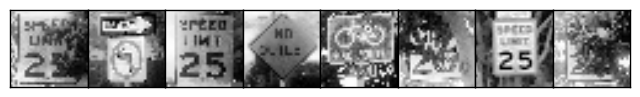

In [64]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import cv2 as cv2
import matplotlib.pyplot as plt
import glob

%matplotlib inline

files = glob.glob('data/cIMG*.png')

my_images = np.ndarray(shape=(8,32,32), dtype=float)
for i, file in enumerate(files):
    im = cv2.imread(file)
    im = grayscale(im)
    im = cv2.equalizeHist(im, (0,254) )
    im = cv2.resize(im, (32,32))
    my_images[i, :, : ] = im

my_images.shape
plot_images(images=my_images, grayscale=True, n_cols=8)

In [68]:
my_x = normalize_grayscale(flatten_all_gray(my_images))

sess = tf.Session()
new_saver = tf.train.import_meta_graph('models/lenet')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
all_vars = tf.trainable_variables()
for v in all_vars:
    print(v.name)

    
#validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
#y_pred = session.run(predicted_class, feed_dict=valid_feed_dict)
        

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.